In [248]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import math

## Importing Dataset

In [249]:
Data = pd.read_csv('../Kaggle/cwurData.csv')
Data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [250]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [251]:
Data_V2 = Data.drop(columns=['world_rank', 'country', 'year', 'broad_impact', 'national_rank'])
Data_V2

,institution,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,Harvard University,7,9,1,1,1,1,5,100.00
1,Massachusetts Institute of Technology,9,17,3,12,4,4,1,91.67
2,Stanford University,17,11,5,4,2,2,15,89.50
3,University of Cambridge,10,24,4,16,16,11,50,86.17
4,California Institute of Technology,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...,...
2195,University of the Algarve,367,567,218,926,845,812,816,44.03
2196,Alexandria University,236,566,218,997,908,645,871,44.03
2197,Federal University of Ceará,367,549,218,830,823,812,824,44.03
2198,University of A Coruña,367,567,218,886,974,812,651,44.02


In [252]:
# Data_V2['broad_impact'] = Data_V2['broad_impact'].fillna(0)
# Data_V2

In [253]:
Data_V2.head(10)

,institution,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,Harvard University,7,9,1,1,1,1,5,100.00
1,Massachusetts Institute of Technology,9,17,3,12,4,4,1,91.67
2,Stanford University,17,11,5,4,2,2,15,89.50
3,University of Cambridge,10,24,4,16,16,11,50,86.17
4,California Institute of Technology,2,29,7,37,22,22,18,85.21
5,Princeton University,8,14,2,53,33,26,101,82.50
6,University of Oxford,13,28,9,15,13,19,26,82.34
7,Yale University,14,31,12,14,6,15,66,79.14
8,Columbia University,23,21,10,13,12,14,5,78.86
9,"University of California, Berkeley",16,52,6,6,5,3,16,78.55


In [254]:
Data_V2 = Data_V2[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations',  'patents', 'score', 'institution']]
Data_V2.head(20)

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,institution
0,7,9,1,1,1,1,5,100.00,Harvard University
1,9,17,3,12,4,4,1,91.67,Massachusetts Institute of Technology
2,17,11,5,4,2,2,15,89.50,Stanford University
3,10,24,4,16,16,11,50,86.17,University of Cambridge
4,2,29,7,37,22,22,18,85.21,California Institute of Technology
5,8,14,2,53,33,26,101,82.50,Princeton University
6,13,28,9,15,13,19,26,82.34,University of Oxford
7,14,31,12,14,6,15,66,79.14,Yale University
8,23,21,10,13,12,14,5,78.86,Columbia University
9,16,52,6,6,5,3,16,78.55,"University of California, Berkeley"


In [255]:
University = Data_V2['institution'].unique()
index = len(University)
print(University)

['Harvard University' 'Massachusetts Institute of Technology'
 'Stanford University' ... 'Babeș-Bolyai University'
 'Henan Normal University' 'Southwest Jiaotong University']


In [256]:
for i in range(index):
    Data_V2.replace(University[i], i, inplace=True)


### Now 0 represents Harward Univeristy, 1 represents Massachusetts Institute of Technology and so on...

In [257]:
Data_V2.head(50)

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,institution
0,7,9,1,1,1,1,5,100.00,0
1,9,17,3,12,4,4,1,91.67,1
2,17,11,5,4,2,2,15,89.50,2
3,10,24,4,16,16,11,50,86.17,3
4,2,29,7,37,22,22,18,85.21,4
5,8,14,2,53,33,26,101,82.50,5
6,13,28,9,15,13,19,26,82.34,6
7,14,31,12,14,6,15,66,79.14,7
8,23,21,10,13,12,14,5,78.86,8
9,16,52,6,6,5,3,16,78.55,9


In [258]:
Data_V2.shape

(2200, 9)

In [259]:
Data_V2.to_csv('/home/nafay/VSCODE/FYP/Data/Kaggle/cwurData_V2.csv', index=False)

In [260]:
University[0]

'Harvard University'

# Applying KNN Algorithm

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


### Split Dataset

In [262]:

X = Data_V2.iloc[:, 0:8]
y = Data_V2.iloc[:, 8]

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
# data = pd.DataFrame(X_data_minmax, columns=['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations',  'patents', 'score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)


In [263]:
X

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,7,9,1,1,1,1,5,100.00
1,9,17,3,12,4,4,1,91.67
2,17,11,5,4,2,2,15,89.50
3,10,24,4,16,16,11,50,86.17
4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...
2195,367,567,218,926,845,812,816,44.03
2196,236,566,218,997,908,645,871,44.03
2197,367,549,218,830,823,812,824,44.03
2198,367,567,218,886,974,812,651,44.02


In [264]:
y

0         0
1         1
2         2
3         3
4         4
       ... 
2195    962
2196    951
2197    964
2198    937
2199    975
Name: institution, Length: 2200, dtype: int64

In [265]:
# X_train, X_test, y_train, y_test = train_test_split(data, y,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [266]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


1540
1540
660
660


In [267]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy: ",result2)

Confusion Matrix: 
[[0 0 2 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         2
          10       0.33      1.00      0.50         1
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         2
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         3
          16       1.00   

/home/nafay/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nafay/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nafay/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nafay/.local/lib/python3.10/site-packages/

### Reasons for Bad Accuracy
1. The total unique universities are 1024, and the total datasets are around 2100. This means each university is appearing a maximum of 3-4 times (with random order). Considering these university appearing more often in the dataset, the accuracy would be more

2. As The above error, some labels in y_test don't appear in y_train. This means that in the dataset, some of the universities are appearing only once (mostly at the end), and since we partitioned the data in 70-30, these universities are appearing in the test_data and not in the training_data

In [456]:
X = list(Data_V2['institution'].value_counts())
for i in range(5):
    print(f"University Appearing {i} times: ", X.count(i))

University Appearing 0 times:  0
University Appearing 1 times:  47
University Appearing 2 times:  869
University Appearing 3 times:  17
University Appearing 4 times:  91


#### If 91 universities, each appearing 4 times in a dataset of 1024 Total Universities, There is no way of classifying this dataset with high accuracy. For that to happen we need the universities to appear more often


#### So, I repeated the same experiment but this time decreased the number of universities from 1024 to 200 and duplicated the dataset, so that the same number of universities are appearing more often.

#### Note: There are a total of 174 registered universities in pakistan both public and private. Even 500 is possible but will take more time. I will take 200 universities just to see the accuracy improvement. (If there is even)

In [293]:
Data_V3 = Data_V2

In [294]:
Data_V3.shape

(2200, 9)

In [295]:
Data_V3.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,institution
0,7,9,1,1,1,1,5,100.00,0
1,9,17,3,12,4,4,1,91.67,1
2,17,11,5,4,2,2,15,89.50,2
3,10,24,4,16,16,11,50,86.17,3
4,2,29,7,37,22,22,18,85.21,4


## Filtering Data to take only 200 univerisites

In [296]:
Data_V3 = Data_V3[(Data_V2['institution'] == 0) | (Data_V2['institution'] == 1)
        | (Data_V2['institution'] == 2) | (Data_V2['institution'] == 3)
        | (Data_V2['institution'] == 4) | (Data_V2['institution'] == 5)
        | (Data_V2['institution'] == 6) | (Data_V2['institution'] == 7)
        | (Data_V2['institution'] == 8) | (Data_V2['institution'] == 9)
        | (Data_V2['institution'] == 10) | (Data_V2['institution'] == 11)
        | (Data_V2['institution'] == 12) | (Data_V2['institution'] == 13)
        | (Data_V2['institution'] == 14) | (Data_V2['institution'] == 15)
        | (Data_V2['institution'] == 16) | (Data_V2['institution'] == 17)
        | (Data_V2['institution'] == 18) | (Data_V2['institution'] == 19)
        | (Data_V2['institution'] == 20) | (Data_V2['institution'] == 21)
        | (Data_V2['institution'] == 22) | (Data_V2['institution'] == 23)
        | (Data_V2['institution'] == 24) | (Data_V2['institution'] == 25)
        | (Data_V2['institution'] == 26) | (Data_V2['institution'] == 27)
        | (Data_V2['institution'] == 28) | (Data_V2['institution'] == 29)
        | (Data_V2['institution'] == 30) | (Data_V2['institution'] == 31)
        | (Data_V2['institution'] == 32) | (Data_V2['institution'] == 33)
        | (Data_V2['institution'] == 34) | (Data_V2['institution'] == 35)
        | (Data_V2['institution'] == 36) | (Data_V2['institution'] == 37)
        | (Data_V2['institution'] == 38) | (Data_V2['institution'] == 39)
        | (Data_V2['institution'] == 40) | (Data_V2['institution'] == 41)
        | (Data_V2['institution'] == 42) | (Data_V2['institution'] == 43)
        | (Data_V2['institution'] == 44) | (Data_V2['institution'] == 45)
        | (Data_V2['institution'] == 46) | (Data_V2['institution'] == 47)
        | (Data_V2['institution'] == 48) | (Data_V2['institution'] == 49)
        | (Data_V2['institution'] == 50) | (Data_V2['institution'] == 51)
        | (Data_V2['institution'] == 52) | (Data_V2['institution'] == 53)
        | (Data_V2['institution'] == 54) | (Data_V2['institution'] == 55)
        | (Data_V2['institution'] == 56) | (Data_V2['institution'] == 57)
        | (Data_V2['institution'] == 58) | (Data_V2['institution'] == 59)
        | (Data_V2['institution'] == 60) | (Data_V2['institution'] == 61)
        | (Data_V2['institution'] == 62) | (Data_V2['institution'] == 63)
        | (Data_V2['institution'] == 64) | (Data_V2['institution'] == 65)
        | (Data_V2['institution'] == 66) | (Data_V2['institution'] == 67)
        | (Data_V2['institution'] == 68) | (Data_V2['institution'] == 69)
        | (Data_V2['institution'] == 70) | (Data_V2['institution'] == 71)
        | (Data_V2['institution'] == 72) | (Data_V2['institution'] == 73)
        | (Data_V2['institution'] == 74) | (Data_V2['institution'] == 75)
        | (Data_V2['institution'] == 76) | (Data_V2['institution'] == 77)
        | (Data_V2['institution'] == 78) | (Data_V2['institution'] == 79)
        | (Data_V2['institution'] == 80) | (Data_V2['institution'] == 81)
        | (Data_V2['institution'] == 82) | (Data_V2['institution'] == 83)
        | (Data_V2['institution'] == 84) | (Data_V2['institution'] == 85)
        | (Data_V2['institution'] == 86) | (Data_V2['institution'] == 87)
        | (Data_V2['institution'] == 88) | (Data_V2['institution'] == 89)
        | (Data_V2['institution'] == 90) | (Data_V2['institution'] == 91)
        | (Data_V2['institution'] == 92) | (Data_V2['institution'] == 93)
        | (Data_V2['institution'] == 94) | (Data_V2['institution'] == 95)
        | (Data_V2['institution'] == 96) | (Data_V2['institution'] == 97)
        | (Data_V2['institution'] == 98) | (Data_V2['institution'] == 99)
        | (Data_V2['institution'] == 100) | (Data_V2['institution'] == 101)
        | (Data_V2['institution'] == 102) | (Data_V2['institution'] == 103)
        | (Data_V2['institution'] == 104) | (Data_V2['institution'] == 105)
        | (Data_V2['institution'] == 106) | (Data_V2['institution'] == 107)
        | (Data_V2['institution'] == 108) | (Data_V2['institution'] == 109)
        | (Data_V2['institution'] == 110) | (Data_V2['institution'] == 111)
        | (Data_V2['institution'] == 112) | (Data_V2['institution'] == 113)
        | (Data_V2['institution'] == 114) | (Data_V2['institution'] == 115)
        | (Data_V2['institution'] == 116) | (Data_V2['institution'] == 117)
        | (Data_V2['institution'] == 118) | (Data_V2['institution'] == 119)
        | (Data_V2['institution'] == 120) | (Data_V2['institution'] == 121)
        | (Data_V2['institution'] == 122) | (Data_V2['institution'] == 123)
        | (Data_V2['institution'] == 124) | (Data_V2['institution'] == 125)
        | (Data_V2['institution'] == 126) | (Data_V2['institution'] == 127)
        | (Data_V2['institution'] == 128) | (Data_V2['institution'] == 129)
        | (Data_V2['institution'] == 130) | (Data_V2['institution'] == 131)
        | (Data_V2['institution'] == 132) | (Data_V2['institution'] == 133)
        | (Data_V2['institution'] == 134) | (Data_V2['institution'] == 135)
        | (Data_V2['institution'] == 136) | (Data_V2['institution'] == 137)
        | (Data_V2['institution'] == 138) | (Data_V2['institution'] == 139)
        | (Data_V2['institution'] == 140) | (Data_V2['institution'] == 141)
        | (Data_V2['institution'] == 142) | (Data_V2['institution'] == 143)
        | (Data_V2['institution'] == 144) | (Data_V2['institution'] == 145)
        | (Data_V2['institution'] == 146) | (Data_V2['institution'] == 147)
        | (Data_V2['institution'] == 148) | (Data_V2['institution'] == 149)
        | (Data_V2['institution'] == 150) | (Data_V2['institution'] == 151)
        | (Data_V2['institution'] == 152) | (Data_V2['institution'] == 153)
        | (Data_V2['institution'] == 154) | (Data_V2['institution'] == 155)
        | (Data_V2['institution'] == 156) | (Data_V2['institution'] == 157)
        | (Data_V2['institution'] == 158) | (Data_V2['institution'] == 159)
        | (Data_V2['institution'] == 160) | (Data_V2['institution'] == 161)
        | (Data_V2['institution'] == 162) | (Data_V2['institution'] == 163)
        | (Data_V2['institution'] == 164) | (Data_V2['institution'] == 165)
        | (Data_V2['institution'] == 166) | (Data_V2['institution'] == 167)
        | (Data_V2['institution'] == 168) | (Data_V2['institution'] == 169)
        | (Data_V2['institution'] == 170) | (Data_V2['institution'] == 171)
        | (Data_V2['institution'] == 172) | (Data_V2['institution'] == 173)
        | (Data_V2['institution'] == 174) | (Data_V2['institution'] == 175)
        | (Data_V2['institution'] == 176) | (Data_V2['institution'] == 177)
        | (Data_V2['institution'] == 178) | (Data_V2['institution'] == 179)
        | (Data_V2['institution'] == 180) | (Data_V2['institution'] == 181)
        | (Data_V2['institution'] == 182) | (Data_V2['institution'] == 183)
        | (Data_V2['institution'] == 184) | (Data_V2['institution'] == 185)
        | (Data_V2['institution'] == 186) | (Data_V2['institution'] == 187)
        | (Data_V2['institution'] == 188) | (Data_V2['institution'] == 189)
        | (Data_V2['institution'] == 190) | (Data_V2['institution'] == 191)
        | (Data_V2['institution'] == 192) | (Data_V2['institution'] == 193)
        | (Data_V2['institution'] == 194) | (Data_V2['institution'] == 195)
        | (Data_V2['institution'] == 196) | (Data_V2['institution'] == 197)
        | (Data_V2['institution'] == 198) | (Data_V2['institution'] == 199)
        | (Data_V2['institution'] == 200) | (Data_V2['institution'] == 201)
        ]


In [297]:
Data_V3.shape

(602, 9)

In [298]:
Data_V3 = pd.concat([Data_V3]*8, ignore_index=True)
Data_V3.shape

(4816, 9)

In [299]:
Data_V3.to_csv('/home/nafay/VSCODE/FYP/Data/Kaggle/cwurData_V3.csv', index=False)


In [407]:
Data_V4 = pd.read_csv('./cwurData_V3.csv')
Data_V4

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,institution
0,7,9,1,1,1,1,5,100.00,0
1,9,17,3,12,4,4,1,91.67,1
2,17,11,5,4,2,2,15,89.50,2
3,10,24,4,16,16,11,50,86.17,3
4,2,29,7,37,22,22,18,85.21,4
...,...,...,...,...,...,...,...,...,...
4811,367,264,97,283,325,115,236,46.89,191
4812,257,294,116,217,197,136,871,46.79,168
4813,151,257,57,359,250,161,553,46.49,190
4814,95,240,116,368,271,321,301,45.74,155


In [408]:
Data_V4['institution'].value_counts()


0      32
69     32
67     32
66     32
65     32
       ..
135    16
134    16
133    16
201    16
94      8
Name: institution, Length: 202, dtype: int64

### This shows that each universities (at least) appears 32 times. 
### In our case we have to get atleast 40-50 students features for each university to get the right precision

In [302]:

X2 = Data_V4.iloc[:, 0:8]
y2 = Data_V4.iloc[:, 8]

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X2)
# data = pd.DataFrame(X_data_minmax, columns=['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations',  'patents', 'score'])

X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, random_state=0, test_size=0.3)


In [303]:
X2

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,7,9,1,1,1,1,5,100.00
1,9,17,3,12,4,4,1,91.67
2,17,11,5,4,2,2,15,89.50
3,10,24,4,16,16,11,50,86.17
4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...
4811,367,264,97,283,325,115,236,46.89
4812,257,294,116,217,197,136,871,46.79
4813,151,257,57,359,250,161,553,46.49
4814,95,240,116,368,271,321,301,45.74


In [304]:
y2

0         0
1         1
2         2
3         3
4         4
       ... 
4811    191
4812    168
4813    190
4814    155
4815    152
Name: institution, Length: 4816, dtype: int64

In [327]:
# X_train, X_test, y_train, y_test = train_test_split(data, y,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [328]:
len(ypred)
print(ypred)

[  5  36 171 ... 157  96  95]


In [329]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


3371
3371
1445
1445


In [330]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy: ",result2)

Confusion Matrix: 
[[ 8  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00 

# Accuracy increased from 8% to 99%


In [313]:
type(X_test)

pandas.core.frame.DataFrame

### Taking custom data

In [356]:
data = {
    'quality_of_education' : 46,
    'alumni_employment' : 101,
    'quality_of_faculty' : 29,
    'publications' : 101,
    'influence' : 93,
    'citations' : 101,
    'patents' : 101,
    'score' :  47.94
}

y_test2 = {
    'institution': 64
}

y_test2 = pd.DataFrame([y_test2])
test = pd.DataFrame([data])
test

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,46,101,29,101,93,101,101,47.94


In [357]:
ypred2 = knn_clf.predict(test)  # These are the predicted output values
ypred2

array([64])

In [358]:
result = confusion_matrix(y_test2, ypred2)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test2, ypred2)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test2,ypred2)
print("Accuracy: ",result2)

Confusion Matrix: 
[[1]]
Classification Report: 
              precision    recall  f1-score   support

          64       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0


### 100% Accuracy

# Naive Bayes Algo

In [388]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [415]:

X = Data_V4.iloc[:, 0:8]
y = Data_V4.iloc[:, 8]

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
# data = pd.DataFrame(X_data_minmax, columns=['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations',  'patents', 'score'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.3)


In [416]:
gnb = GaussianNB()
ypred = gnb.fit(X_train, y_train).predict(X_test)

## Evalaution

In [417]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy: ",result2)

Confusion Matrix: 
[[ 8  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00 

### 96% Accuracy

### Testing Custom Data

In [418]:
data = {
    'quality_of_education': 30,
    'alumni_employment': 22,
    'quality_of_faculty': 13,
    'publications': 27,
    'influence': 45,
    'citations': 67,
    'patents': 18,
    'score':  75.30
}
y_test2 = {
    'institution': 16
}

y_test2 = pd.DataFrame([y_test2])
test = pd.DataFrame([data])
test


,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,30,22,13,27,45,67,18,75.3


In [419]:
ypred2 = gnb.fit(X_train, y_train).predict(test)
ypred2

array([16])

In [420]:
result = confusion_matrix(y_test2, ypred2)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test2, ypred2)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test2,ypred2)
print("Accuracy: ",result2)

Confusion Matrix: 
[[1]]
Classification Report: 
              precision    recall  f1-score   support

          16       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0


### Accuracy 100%

# Multinomial Logistic Regression

In [431]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# import statsmodels.api as sm
import matplotlib.pyplot as plt


In [432]:
X = Data_V4.iloc[:, 0:8]
y = Data_V4.iloc[:, 8]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.20, random_state=5)


In [433]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial',
                            penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)


### Takes alot of time!

In [434]:
params = model1.get_params()
print(params)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [435]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)


Intercept: 
 [ 2.75176655e-02  2.90012795e-02  1.10587273e-02  2.73949279e-02
  1.10615508e-02  1.23390209e-02 -1.84790739e-02  4.42786341e-02
  5.90333079e-02  4.11951243e-02  2.80580928e-02  1.73083403e-02
  5.96576416e-02  3.39983001e-02  3.47381727e-02  1.64108436e-02
  3.28300019e-02  1.08741953e-02  5.07407146e-02  3.39725949e-02
 -1.24440112e-02  5.71177975e-03  3.72704463e-02  1.92066752e-02
  8.89019741e-02  4.57882718e-02  7.58735943e-02  2.64783423e-02
  4.53843019e-02  4.16010026e-02  7.48213454e-02  2.51511422e-02
  2.60310045e-02  2.70461986e-02  3.12751881e-02  9.38512891e-03
  2.94559879e-03  5.74720180e-03  3.04464938e-02  1.42101787e-02
  5.11140548e-02  2.52649236e-02  5.03773206e-03  2.20759513e-02
  1.05444188e-01  2.75038495e-02  4.31279014e-02  1.03487544e-02
 -3.64516969e-02 -5.62797679e-01 -7.55252108e-03  1.05056639e-02
  2.12737810e-02 -2.00809834e-02  3.46085243e-03  4.66781527e-03
  8.92893244e-04  6.82543019e-03 -2.97484592e-05  2.16055847e-01
 -9.49827225

In [437]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00        10
       

In [439]:
pred2 = model1.predict(test)
pred2

array([16])

# K-Means Clustering

In [458]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [464]:
X = Data_V4.iloc[:, 0:8]
X

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,7,9,1,1,1,1,5,100.00
1,9,17,3,12,4,4,1,91.67
2,17,11,5,4,2,2,15,89.50
3,10,24,4,16,16,11,50,86.17
4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...
4811,367,264,97,283,325,115,236,46.89
4812,257,294,116,217,197,136,871,46.79
4813,151,257,57,359,250,161,553,46.49
4814,95,240,116,368,271,321,301,45.74


In [468]:
Y = Data_V4.iloc[:, 8]
Y.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [474]:
clustering_kmeans = KMeans(n_clusters=201)
X['clusters'] = clustering_kmeans.fit_predict(X)


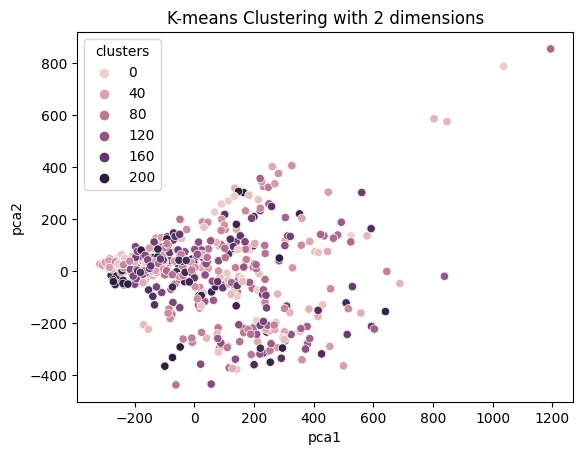

In [475]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=X['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


### Yea....in this dataset specifically it wont work (Since I duplicated the data)
### K means will be very difficult in our case, bc this method will require clusters = 300 or 400 (depending on the number of universities)